## Baseline ML Models: Logistic Regression using RBF Kernel

#### Imports

In [15]:
%matplotlib inline
import matplotlib.image as mpimg
import numpy as np
import matplotlib.pyplot as plt
import os,sys
from PIL import Image

In [16]:
from utils.helpers import *

#### Loading the training dataset

In [17]:
# Loaded a set of images
root_dir = "data/training/"

image_dir = root_dir + "images/"
files = os.listdir(image_dir)
n = len(files)
print("Loading " + str(n) + " images")
imgs = [load_image(image_dir + files[i]) for i in range(n)]
print(files[0])

gt_dir = root_dir + "groundtruth/"
print("Loading " + str(n) + " images")
gt_imgs = [load_image(gt_dir + files[i]) for i in range(n)]
print(files[0])

n = 10 # Only use 10 images for training

Loading 100 images
satImage_001.png
Loading 100 images
satImage_001.png


In [18]:
# Extract patches and labels for each input image
patch_size = 16 # each patch is 16*16 pixels
img_patches, Y = extract_patches_labels(imgs, gt_imgs, patch_size, 0, n)
# Compute features for each image patch
X = np.asarray([extract_features_2d(img_patches[i]) for i in range(len(img_patches))])

In [19]:
# Print feature statistics

print('Computed ' + str(X.shape[0]) + ' features')
print('Feature dimension = ' + str(X.shape[1]))
print('Number of classes = ' + str(np.max(Y)))  #TODO: fix, length(unique(Y)) 

Y0 = [i for i, j in enumerate(Y) if j == 0]
Y1 = [i for i, j in enumerate(Y) if j == 1]
print('Class 0: ' + str(len(Y0)) + ' samples')
print('Class 1: ' + str(len(Y1)) + ' samples')

Computed 6250 features
Feature dimension = 2
Number of classes = 1
Class 0: 4422 samples
Class 1: 1828 samples


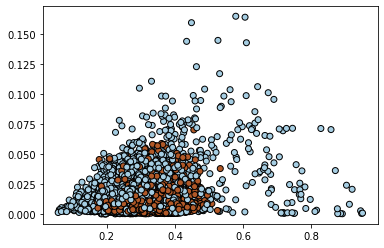

In [20]:
# Plot 2d features using groundtruth to color the datapoints
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)

### Logistic Regression using RBF Kernel

In [21]:
from sklearn.decomposition import KernelPCA
from sklearn import linear_model

1) Predicting using Grey Images as input data

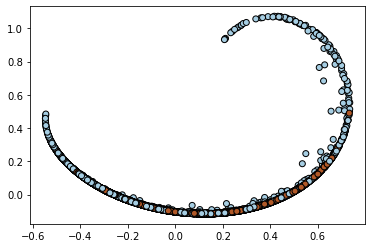

In [22]:
# Plot Kernel-PCA features using groundtruth as coloration
kpca = KernelPCA(n_components=2,kernel="rbf", fit_inverse_transform=True, gamma=10)
X_kpca = kpca.fit_transform(X)
plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)

In [23]:
# Training logistic regression
logreg_KPCA = linear_model.LogisticRegression(C=1e5, class_weight="balanced")
logreg_KPCA.fit(X_kpca, Y)

LogisticRegression(C=100000.0, class_weight='balanced')

In [24]:
# Predict on the training set
Z_kpca = logreg_KPCA.predict(X_kpca)

# Get non-zeros in prediction and grountruth arrays
Zn_kpca = np.nonzero(Z_kpca)[0]
Yn = np.nonzero(Y)[0]

TPR = len(list(set(Yn) & set(Zn_kpca))) / float(len(Z_kpca))
print('True positive rate = ' + str(TPR))

True positive rate = 0.19776


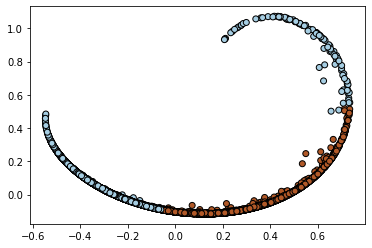

In [25]:
# Plot features using predictions to color datapoints
plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c=Z_kpca, edgecolors='k', cmap=plt.cm.Paired)

2) Predicting using Color Images as input data

In [26]:
# 6-dimensional features
X_color = np.asarray([extract_features(img_patches[i]) for i in range(len(img_patches))])
Y_color = Y

In [27]:
# Plot Kernel-PCA features using groundtruth as coloration
kpca = KernelPCA(n_components=2,kernel="rbf", fit_inverse_transform=True, gamma=10)
X_color_kpca = kpca.fit_transform(X_color)

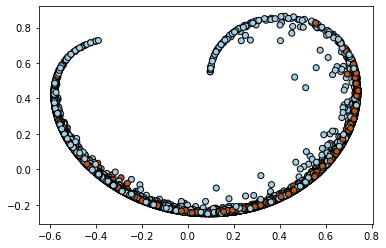

In [28]:
# Plot features using predictions to color datapoints
plt.scatter(X_color_kpca[:, 0], X_color_kpca[:, 1], c=Y_color, edgecolors='k', cmap=plt.cm.Paired)

In [29]:
# Training logistic regression
logreg_KPCA = linear_model.LogisticRegression(C=1e5, class_weight="balanced")
logreg_KPCA.fit(X_color_kpca, Y_color)

LogisticRegression(C=100000.0, class_weight='balanced')

In [30]:
# Predict on the training set
Z_color_kpca = logreg_KPCA.predict(X_color_kpca)

# Get non-zeros in prediction and grountruth arrays
Zn_color_kpca = np.nonzero(Z_color_kpca)[0]
Yn_color = np.nonzero(Y_color)[0]

TPR_color = len(list(set(Yn_color) & set(Zn_color_kpca))) / float(len(Z_color_kpca))
print('True positive rate = ' + str(TPR_color))

True positive rate = 0.1848


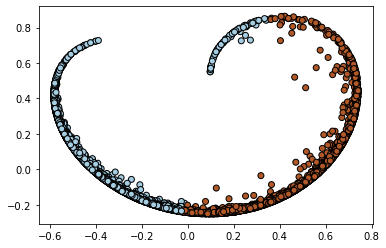

In [31]:
# Plot features using predictions to color datapoints
plt.scatter(X_color_kpca[:, 0], X_color_kpca[:, 1], c=Z_color_kpca, edgecolors='k', cmap=plt.cm.Paired)